# Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

# Рейтинг шоколада

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [144]:
df = pd.read_csv('flavors_of_cacao.csv')

In [145]:
df.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,NaN,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,NaN,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,NaN,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,NaN,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,NaN,Peru


In [146]:
df.shape

(1795, 9)

# Обработка пропусков

Найдем пропуски

In [147]:
df.isnull().sum()

Company \n(Maker-if known)             0
Specific Bean Origin\nor Bar Name      0
REF                                    0
Review\nDate                           0
Cocoa\nPercent                         0
Company\nLocation                      0
Rating                                 0
Bean\nType                           888
Broad Bean\nOrigin                     1
dtype: int64

In [148]:
df.columns

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

Вывод уникальных значений столбца

In [149]:
def print_unique(data, column, **kwargs):
    result = data[column].dropna().unique()
    try:
        kwargs['key']
    except:
        kwargs['key'] = None

    if kwargs['key']:
        result = sorted(result, key=kwargs['key'])
    else:
        result = sorted(result)
    print(f'Column: \'{column}\';\nUnique values: {result if len(result) < 68 else "[...]"};\nCount: {len(result)}')

Проверил столбец Bean\nType

In [150]:
print_unique(df, 'Bean\nType')

Column: 'Bean
Type';
Unique values: ['Amazon', 'Amazon mix', 'Amazon, ICS', 'Beniano', 'Blend', 'Blend-Forastero,Criollo', 'CCN51', 'Criollo', 'Criollo (Amarru)', 'Criollo (Ocumare 61)', 'Criollo (Ocumare 67)', 'Criollo (Ocumare 77)', 'Criollo (Ocumare)', 'Criollo (Porcelana)', 'Criollo (Wild)', 'Criollo, +', 'Criollo, Forastero', 'Criollo, Trinitario', 'EET', 'Forastero', 'Forastero (Amelonado)', 'Forastero (Arriba)', 'Forastero (Arriba) ASS', 'Forastero (Arriba) ASSS', 'Forastero (Catongo)', 'Forastero (Nacional)', 'Forastero (Parazinho)', 'Forastero(Arriba, CCN)', 'Forastero, Trinitario', 'Matina', 'Nacional', 'Nacional (Arriba)', 'Trinitario', 'Trinitario (85% Criollo)', 'Trinitario (Amelonado)', 'Trinitario (Scavina)', 'Trinitario, Criollo', 'Trinitario, Forastero', 'Trinitario, Nacional', 'Trinitario, TCGA'];
Count: 40


Мы не знаем происхождение шоколада
Заполнил пропуски в столбце на Unknown

In [151]:
BT_df = df[['Bean\nType']]
BT_df_imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Unknown')
BT_df = BT_df_imputer.fit_transform(BT_df)
BT_df

array([['Unknown'],
       ['Unknown'],
       ['Unknown'],
       ...,
       ['Forastero'],
       ['Unknown'],
       ['Unknown']], dtype=object)

In [152]:
df[['Bean\nType']] = BT_df

In [153]:
df = df.dropna(subset = 'Broad Bean\nOrigin')

In [154]:
df.isnull().sum()

Company \n(Maker-if known)           0
Specific Bean Origin\nor Bar Name    0
REF                                  0
Review\nDate                         0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           0
Broad Bean\nOrigin                   0
dtype: int64

## Кодирование категориальных признаков

In [155]:
le = LabelEncoder()

Выведем все уникальные значения во всех столбцах, чтобы оценить, какие из них можно отнести к категориальным


In [156]:
for column in df.columns:
    print_unique(df, column)
    print()

Column: 'Company 
(Maker-if known)';
Unique values: [...];
Count: 416

Column: 'Specific Bean Origin
or Bar Name';
Unique values: [...];
Count: 1039

Column: 'REF';
Unique values: [...];
Count: 440

Column: 'Review
Date';
Unique values: [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017];
Count: 12

Column: 'Cocoa
Percent';
Unique values: ['100%', '42%', '46%', '50%', '53%', '55%', '56%', '57%', '58%', '60%', '60.5%', '61%', '62%', '63%', '64%', '65%', '66%', '67%', '68%', '69%', '70%', '71%', '72%', '72.5%', '73%', '73.5%', '74%', '75%', '76%', '77%', '78%', '79%', '80%', '81%', '82%', '83%', '84%', '85%', '86%', '87%', '88%', '89%', '90%', '91%', '99%'];
Count: 45

Column: 'Company
Location';
Unique values: ['Amsterdam', 'Argentina', 'Australia', 'Austria', 'Belgium', 'Bolivia', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic', 'Denmark', 'Domincan Republic', 'Ecuador', 'Eucador', 'Fiji', 'Finland', 'France', 'Germany', 'Ghana', 'Grenada', 

Используя LabelEncoder, заменил категориальные признаки закодированными


In [157]:
df['Company \n(Maker-if known_Company)'] = le.fit_transform(df['Company \n(Maker-if known)'])
df['Specific Bean Origin\nor Bar Name_Specific'] = le.fit_transform(df['Specific Bean Origin\nor Bar Name'])
df['Company\nLocation_Company'] = le.fit_transform(df['Company\nLocation'])
df['Bean\nType_Bean'] = le.fit_transform(df['Bean\nType'])
df['Broad Bean\nOrigin_Broad'] = le.fit_transform(df['Broad Bean\nOrigin'])
df.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin,Company \n(Maker-if known_Company),Specific Bean Origin\nor Bar Name_Specific,Company\nLocation_Company,Bean\nType_Bean,Broad Bean\nOrigin_Broad
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,Unknown,Sao Tome,0,14,18,40,67
1,A. Morin,Kpime,1676,2015,70%,France,2.75,Unknown,Togo,0,492,18,40,77
2,A. Morin,Atsane,1676,2015,70%,France,3.00,Unknown,Togo,0,67,18,40,77
3,A. Morin,Akata,1680,2015,70%,France,3.50,Unknown,Togo,0,15,18,40,77
4,A. Morin,Quilla,1704,2015,70%,France,3.50,Unknown,Peru,0,809,18,40,55


## Масштабирование данных

In [158]:
mms = MinMaxScaler()

Создадим гистограммы для каждых числовых признаков

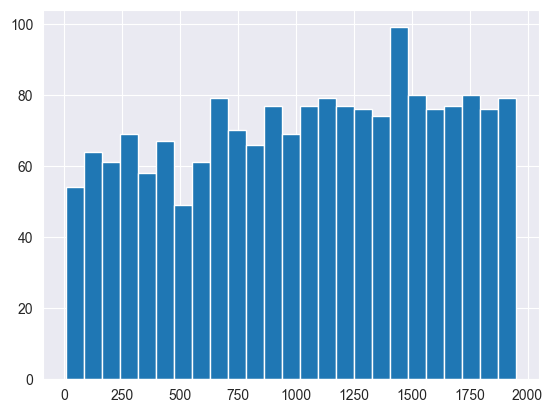

In [159]:
plt.hist(df['REF'], 25)
plt.show()

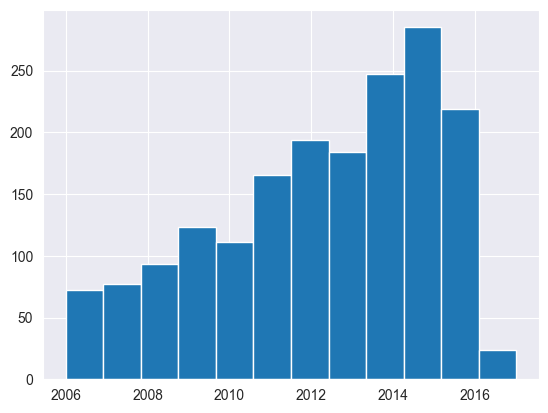

In [160]:
plt.hist(df['Review\nDate'], 12)
plt.show()

Cocoa\nPercent записан с процентами, преобразуем в числовой

In [161]:
cp_data = df['Cocoa\nPercent']
new_data = []
for value in cp_data:
    new_data += [float(value[:-1])]
df['Cocoa\nPercent'] = new_data

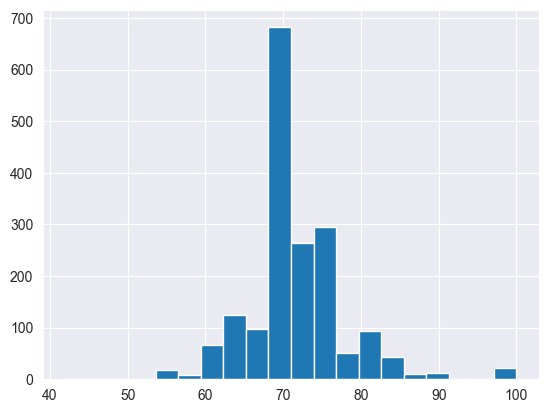

In [162]:
plt.hist(df['Cocoa\nPercent'], 20)
plt.show()

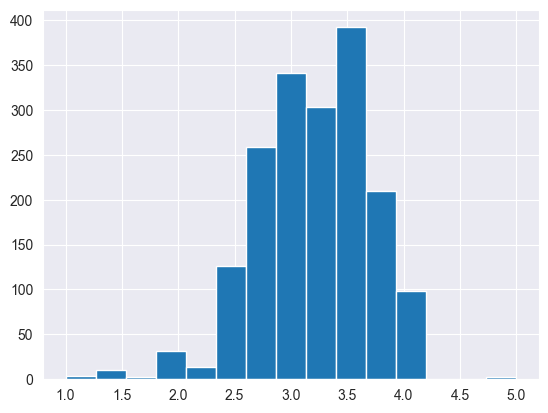

In [163]:
plt.hist(df['Rating'], 15)
plt.show()

Масштабируем признаки с помощью MinMaxScaler и заменил данные датасета

In [164]:
ua_scaled = mms.fit_transform(df[['REF']])
la_scaled = mms.fit_transform(df[['Review\nDate']])
rpp_scaled = mms.fit_transform(df[['Cocoa\nPercent']])
rpp_scaled = mms.fit_transform(df[['Rating']])
df['REF_REF'] = ua_scaled
df['Review\nDate_Review'] = la_scaled
df['Cocoa\nPercent_Cocoa'] = rpp_scaled
df['Rating_Rating'] = rpp_scaled

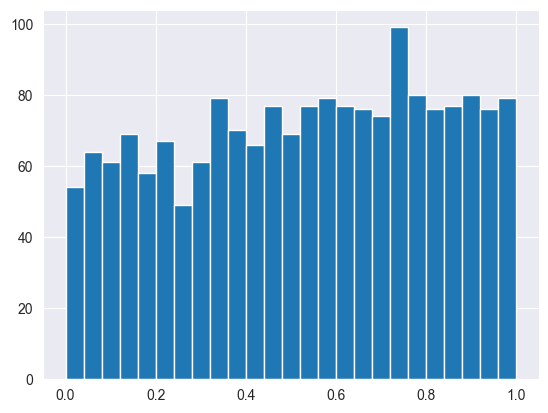

In [165]:
plt.hist(df['REF_REF'], 25)
plt.show()

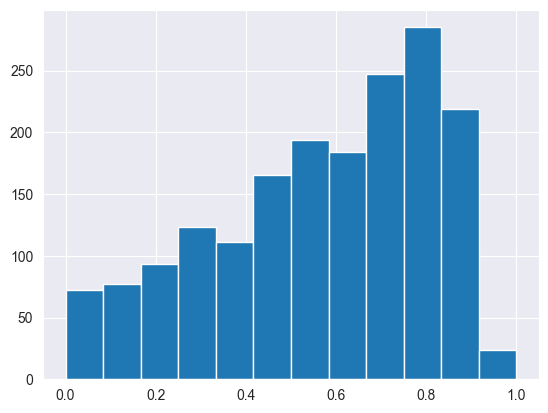

In [166]:
plt.hist(df['Review\nDate_Review'], 12)
plt.show()

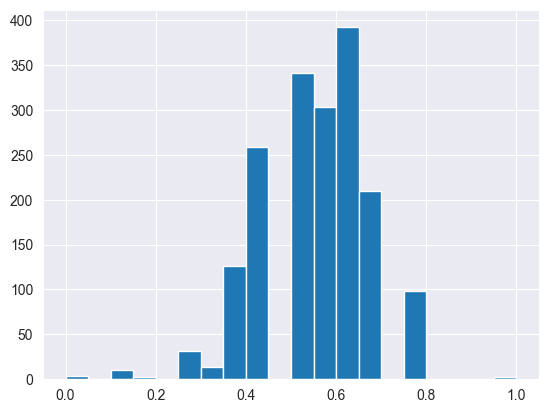

In [167]:
plt.hist(df['Cocoa\nPercent_Cocoa'], 20)
plt.show()

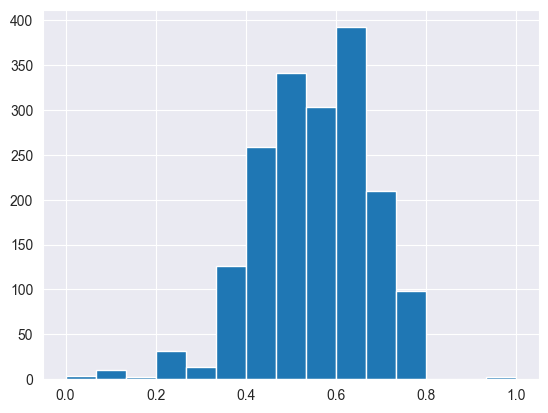

In [168]:
plt.hist(df['Rating_Rating'], 15)
plt.show()

Первые 5 строчек датасета после всех преобразований

In [169]:
df.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin,Company \n(Maker-if known_Company),Specific Bean Origin\nor Bar Name_Specific,Company\nLocation_Company,Bean\nType_Bean,Broad Bean\nOrigin_Broad,REF_REF,Review\nDate_Review,Cocoa\nPercent_Cocoa,Rating_Rating
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,Unknown,Sao Tome,0,14,18,40,67,0.960966,0.909091,0.6875,0.6875
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,Unknown,Togo,0,492,18,40,77,0.858243,0.818182,0.4375,0.4375
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,Unknown,Togo,0,67,18,40,77,0.858243,0.818182,0.5000,0.5000
3,A. Morin,Akata,1680,2015,70.0,France,3.50,Unknown,Togo,0,15,18,40,77,0.860298,0.818182,0.6250,0.6250
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,Unknown,Peru,0,809,18,40,55,0.872625,0.818182,0.6250,0.6250
